# Assignment - 2

<b> Here are the assignment questions:
<img src="Assignment-2.PNG" style="width:550px;height:550px;">

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1) 

# Initial displacement

In [2]:
# Given
Fst = 150*1000 # in N
E = 29*10**9 
Iy = (1/12)*(0.4**4)

du0 = 0.15 # initial velocity in m/sec

#---- From assignment-1

ω = 347.596  # circular frequency ω from Assignment-1 for fixed end
L = 3.405  # from assignment-1, which is height of the columns

<b><u> Initial displacement,    $\Delta_{max} = \frac{PL^3} {EI} $

In [3]:
# initial displacement
u0 = (Fst*L**3)/(E*Iy)  # in m
u0

0.09571629744746765

# Case-I: Free undamped vibration

<b> <u> Free undamped vibration:</u></b>
   
 u(t) = $\frac{du_0} {\omega}sin(\omega t) + u_0 cos(\omega t)$ 
 <br> <br>
 du(t) = $du_0 cos(\omega t) - \omega u_0 sin(\omega t)$

In [4]:
# ut =  (du0/ω)*sin(ω*t)+u0*cos(ω*t)
def Free_undamped_vibration(t):
    ut = (du0/ω)*np.sin(ω*t)+u0*np.cos(ω*t)
    dut = du0*np.cos(ω*t)-ω*u0*np.sin(ω*t)
    
    return ut, dut

## Displacement u and the velocity u΄ at the time t=0.2 sec.

In [5]:
result = Free_undamped_vibration(0.2)
print("Displacement at t = 0.2 second is: " + str(result[0]))
print("Velocity at t = 0.2 second is: " + str(result[1]))

Displacement at t = 0.2 second is: 0.08817436663496474
Velocity at t = 0.2 second is: -12.94568507502106


## Displacement and velocity versus time plot

In [6]:
u1=[]
du1=[]
t1=[]
for i in range (0, 21000):
    tm = i/100000
    t1.append(tm)
    u1.append(Free_undamped_vibration(tm)[0])
    du1.append(Free_undamped_vibration(tm)[1])

# u = Free_undamped_vibration(t)[0]
# du=Free_undamped_vibration(t)[1]

Plot

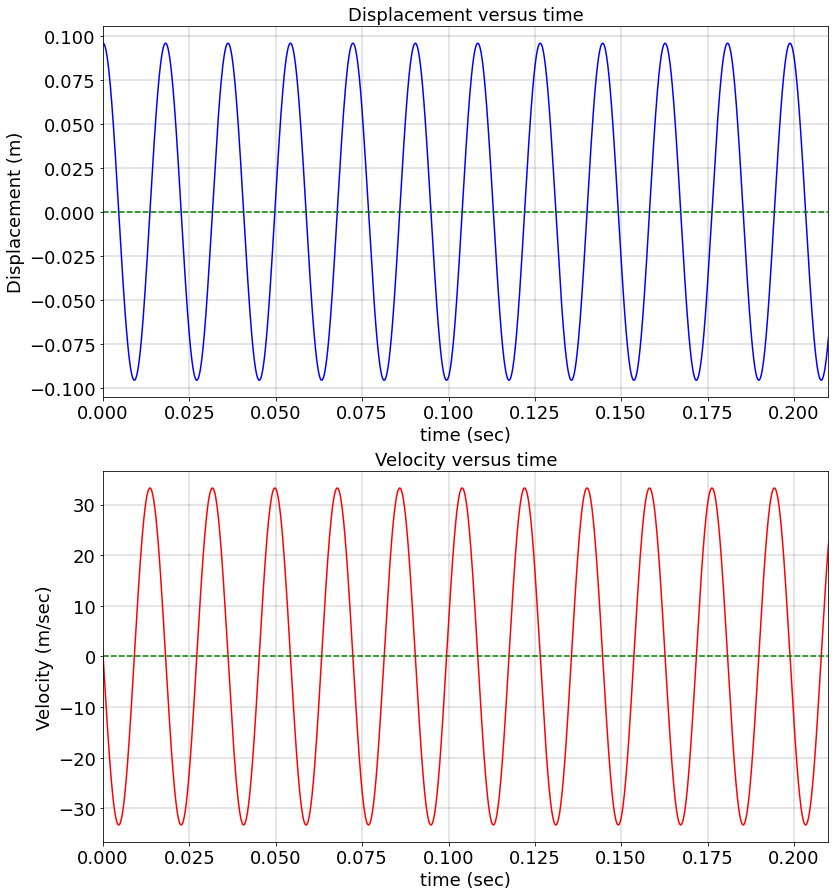

In [7]:
#-----PLOT
plt.figure(figsize=(13,15))  # plot size
fontsz = 18
lm1 = np.max(t1)

# font size
plt.rcParams['font.size'] = '18'  # font size of axis label

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.subplot(2, 1, 1)
plt.plot(t1, u1, c='b')
plt.xlabel(r'time (sec)', fontsize = fontsz)
# plt.ylabel(r'$u_{t} (t)$', fontsize = fontsz)
plt.ylabel('Displacement (m)', fontsize = fontsz)
plt.title('Displacement versus time', fontsize=fontsz)


x = [0, np.max(t1)]    
y = [0, 0]
plt.plot(x, y, 'g--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm1])
axes.set_ylim([1.1*np.min(u1), 1.1*np.max(u1)])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

#------------------------------
plt.subplot(2, 1, 2)
plt.plot(t1, du1, c='r')
plt.xlabel(r'time (sec)', fontsize = fontsz)
plt.ylabel('Velocity (m/sec)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Velocity versus time', fontsize=fontsz)

x = [0, lm1]    
y = [0, 0]
plt.plot(x, y, 'g--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm1])
axes.set_ylim([1.1*np.min(du1), 1.1*np.max(du1)])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.show();


# Case II: Free damped vibration

<b> <u> Free damped vibration:</u></b>
   
 u(t) = $e^-\zeta \omega t (Acos(\omega_d t)+Bsin(\omega_d t))$
 <br> <br>
 du(t) = $e^-\zeta \omega t [(B\omega_d -\zeta \omega A)cos(\omega_d t)-(A\omega_d + \zeta \omega B) sin(\omega_d t)] $

$\zeta $ : Damping coefficeint <br>
$\omega_d$ : Damped natural frequency

In [8]:
# Free damped vibration
ζ = 0.05
ωd = ω*(1-ζ**2)**0.5

A = u0; 
B = (du0+u0*ζ*ω)/ωd

def Free_damped_vibration(t):
    ut = np.exp(-1*ζ*ω*t)*(A*np.cos(ωd*t)+B*np.sin(ωd*t))
    dut = np.exp(-1*ζ*ω*t)*((B*ωd-ζ*ω*A)*np.cos(ωd*t)-
                            (A*ωd+ζ*ω*B)*np.sin(ωd*t))
    
    return ut, dut

## Displacement u and the velocity u΄ at the time t=0.2 sec.

In [9]:
result_damped = Free_damped_vibration(0.2)
print("Displacement at t = 0.2 second is: " + str(result_damped[0]))
print("Velocity at t = 0.2 second is: " + str(result_damped[1]))

Displacement at t = 0.2 second is: 0.00286339954115385
Velocity at t = 0.2 second is: -0.3170676441465691


## Displacement and velocity versus time plot

In [10]:
u2=[]
du2=[]
t2=[]
for i in range (0, 350):
    tm = i/1000
    t2.append(tm)
    u2.append(Free_damped_vibration(tm)[0])
    du2.append(Free_damped_vibration(tm)[1])

# u = Free_undamped_vibration(t)[0]
# du=Free_undamped_vibration(t)[1]

Plot

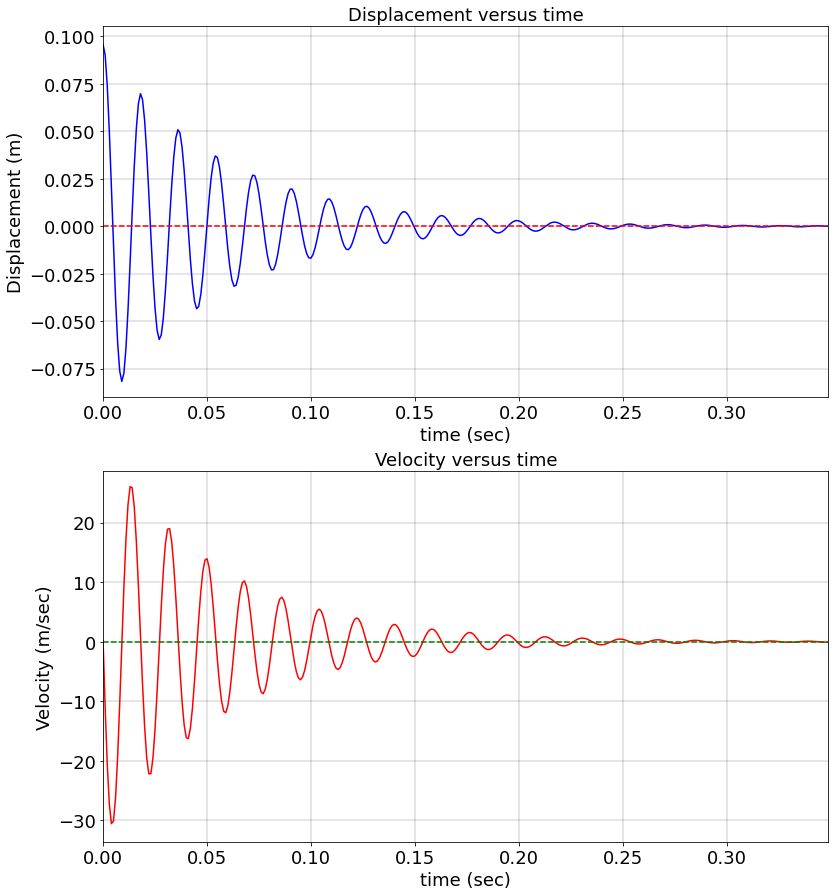

In [11]:
#-----PLOT
plt.figure(figsize=(13,15))  # plot size
fontsz = 18
lm = np.max(t2)

# font size
plt.rcParams['font.size'] = '18'  # font size of axis label

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.subplot(2, 1, 1)
plt.plot(t2, u2, c='b')
plt.xlabel(r'time (sec)', fontsize = fontsz)
# plt.ylabel(r'$u_{t} (t)$', fontsize = fontsz)
plt.ylabel('Displacement (m)', fontsize = fontsz)
plt.title('Displacement versus time', fontsize=fontsz)

x = [0, lm]    
y = [0, 0]
plt.plot(x, y, 'r--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(u2), 1.1*np.max(u2)])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)
#-------------------------

plt.subplot(2, 1, 2)
plt.plot(t2, du2, c='r')
plt.xlabel(r'time (sec)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.ylabel('Velocity (m/sec)', fontsize = fontsz)
plt.title('Velocity versus time', fontsize=fontsz)


x = [0, lm]    
y = [0, 0]
plt.plot(x, y, 'g--')
# plt.plot(x, np.multiply(x, 0.8), 'k--')
# plt.plot(x, np.multiply(x, 1.2), 'k--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(du2), 1.1*np.max(du2)])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.show();
